In [2]:
import numpy as np
import sys
from scipy.ndimage import gaussian_filter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import copy
%matplotlib inline
sys.path.append('../../')
from package_global_functions import *

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/sim_phase_space/symmetric/results'
    tline_path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
else:
    print('CAREFUL! NO EXTERNAL SSD!')
    path = './results'
    tline_path = '../../det_sols_from_polynomial/res_files'

In [34]:
# per passar un mapa antic que estaba en csv a np array... pero al final no ho faig servir per N=35
if_name = 'results_old/q1_7_q2_10_phase_space_Galla_ic_N_Nbots_35.csv'
df_phase_space = pd.read_csv(if_name)
pi = df_phase_space['pi'].unique()
lamb = df_phase_space['lambda'].unique()
df_phase_space = df_phase_space.rename(columns={'lambda':'lamb'})
magnituds = ['f0', 'f1', 'f2', 'sdf0', 'sdf1', 'sdf2', 'Q', 'sdQ']
grid_fs = np.empty([8, len(pi), len(lamb)])
for i,p in enumerate(pi[0:1]):
    for j,l in enumerate(lamb[0:1]):
        for k,m in enumerate(magnituds):
            grid_fs[k,i,j] = float(df_phase_space.query('pi == @p & lamb == @l')[m])

xgrid_pi, ygrid_l = np.mgrid[pi[0]:pi[-1]:complex(0,len(pi)), lamb[0]:lamb[-1]:complex(0,len(lamb))]
xgrid_pi, ygrid_l = np.around(xgrid_pi,2), np.around(ygrid_l,2)
np.savez(f'results/q1_7.0_q2_10.0_phase_space_Galla_ic_N_Nbots_35.npz', x=xgrid_pi, y=ygrid_l, fs=grid_fs)
# mesh = np.load('results/q1_7.0_q2_10.0_phase_space_Galla_ic_N_Nbots_35.npz')
# fig, ax = plt.subplots()
# ax.pcolormesh(mesh['x'], mesh['y'], mesh['fs'][2], cmap='Reds', shading='nearest')

In [57]:
model = 'Galla'
q1, q2, ic, N = 7.0, 10.0, 'N', 100

mesh_file = f'q1_{q1}_q2_{q2}_phase_space_{model}_ic_{ic}_Nbots_{N}.npz'
mesh = np.load(f'{path}/{mesh_file}')

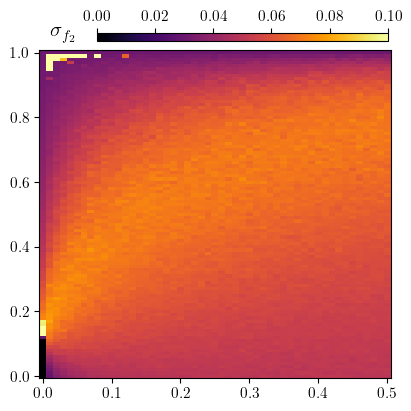

In [70]:
# fig, ax = plt.subplots(constrained_layout=True)

latexFont(titlesize=11, ticklabelssize=11, labelsize=13)
fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)

ax.set(xlim=(-0.005, 0.505), ylim=(-0.005, 1.01))
fig.text(0.11, 0.92, '$\sigma_{f_2}$')

indexi, indexj = 6, -6
indexi = 0
if indexi:
    z = mesh['fs'][5][indexi:, :indexj]
else:
    z = mesh['fs'][5]

vmax = np.max(z)

# z = gaussian_filter(z, sigma=0.2)

cmap = copy.copy(matplotlib.colormaps['inferno'])
cmap.set_bad(cmap.colors[0])

logmap = False
if logmap:
    vmin = np.min(z[z>0])
    vmin = 0.05
    vmax = 0.1
    if indexi:
        im = ax.pcolormesh(mesh['x'][indexi:, :indexj], mesh['y'][indexi:, :indexj], z, cmap=cmap, shading='nearest', norm = LogNorm(vmin, vmax), rasterized=True)
    else:
        im = ax.pcolormesh(mesh['x'], mesh['y'], z, cmap=cmap, shading='nearest', norm = LogNorm(vmin, vmax), rasterized=True)
else:
    vmin = np.min(z)
    vmax = 0.1
    if indexi:
        im = ax.pcolormesh(mesh['x'][indexi:, :indexj], mesh['y'][indexi:, :indexj], z, cmap=cmap, shading='nearest', vmin=vmin, vmax=vmax, rasterized=True)
    else:
        im = ax.pcolormesh(mesh['x'], mesh['y'], z, cmap=cmap, shading='nearest', vmin=vmin, vmax=vmax, rasterized=True)

# fig.colorbar(im)
fig.colorbar(im, ax=ax, location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))

# fig.savefig(f'cmap_sym_sdf2_q1_{q1}_q2_{q2}_N_{N}_gaussianFilter_adjusted_linScale.png')
fig.savefig(f'cmap_sym_sdf2_q1_{q1}_q2_{q2}_N_{N}_gaussianFilter_adjusted_linScale.pdf')
# fig.savefig(f'cmap_sym_sdf2_q1_{q1}_q2_{q2}_N_{N}_gaussianFilter.png')
# fig.savefig(f'cmap_sym_sdf2_q1_{q1}_q2_{q2}_N_{N}.png')
# fig.savefig(f'cmap_sym_sdf2_q1_{q1}_q2_{q2}_N_{N}_adjusted_linscale.png')

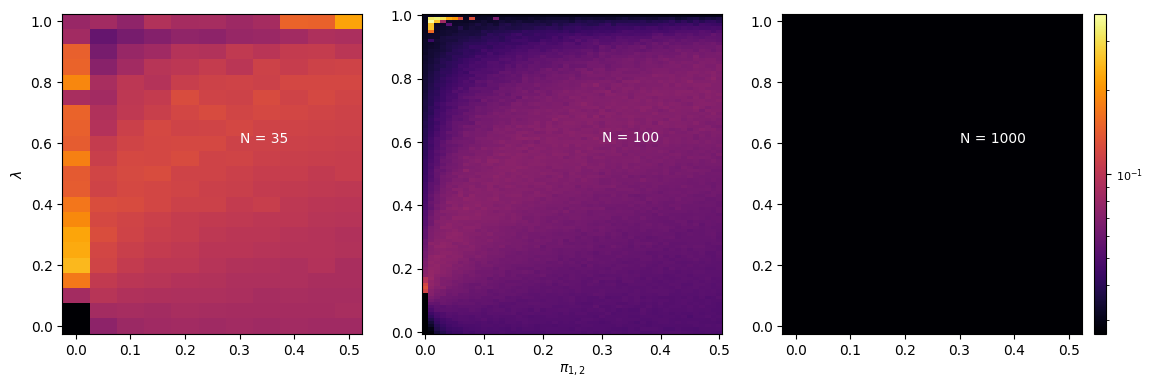

In [56]:
q1, q2, ic = 7.0, 10.0, 'N'
model = 'Galla'

fig, ax = plt.subplots(1,3, figsize=(12,4))

# search vmin, vmax:
# vmin, vmax = None, None
vmins, vmaxs = [], []
for N in [35, 100, 1000]:
    mesh_file = f'q1_{q1}_q2_{q2}_phase_space_{model}_ic_{ic}_Nbots_{N}.npz'
    mesh = np.load(f'{path}/{mesh_file}')
    vminN, vmaxN = np.min(mesh['fs'][5]), np.max(mesh['fs'][5])
    # vmin = vminN if vmin == None or vminN < vmin else vminN
    # vmax = vmaxN if vmax == None or vmaxN > vmax else vminN
    vmins.append(np.min(mesh['fs'][5])), vmaxs.append(np.max(mesh['fs'][5]))

vmin, vmax = min(vmins), max(vmaxs)
# print(vmin, vmax)

# vmin, vmax = 0.01, 0.1


logmap = True

cmap = copy.copy(matplotlib.colormaps['inferno'])
cmap.set_bad(cmap.colors[0])
for i,N in enumerate([35, 100, 1000]):
    mesh_file = f'q1_{q1}_q2_{q2}_phase_space_{model}_ic_{ic}_Nbots_{N}.npz'
    mesh = np.load(f'{path}/{mesh_file}')
    if logmap:
        if vmin == 0.0:
            z = mesh['fs'][5]
            vmin = np.min(z[z>0])
        im = ax[i].pcolormesh(mesh['x'], mesh['y'], mesh['fs'][5], cmap=cmap, shading='nearest', norm = LogNorm(vmin, vmax))
    else:
        # vmin, vmax = 0.0, 0.1
        im = ax[i].pcolormesh(mesh['x'], mesh['y'], mesh['fs'][5], cmap='magma', shading='nearest', vmin=vmin, vmax=vmax)
    ax[i].text(0.3, 0.6, f'N = {N}', color='xkcd:white')
ax[1].set_xlabel('$\pi_{1,2}$')
ax[0].set_ylabel('$\lambda$')

# Make some room for the colorbar
fig.subplots_adjust(left=0.07, right=0.92, bottom=0.125, top=0.925)
# Add the colorbar outside...
box = ax[-1].get_position()
pad, width = 0.01, 0.01
cax = fig.add_axes([box.xmax + pad, box.ymin, width, box.height])
cb = fig.colorbar(im, cax=cax)
cb.ax.tick_params(labelsize=8)

fig.savefig(f'cmaps_sym_sdf2_varN_q1_{q1}_q2_{q2}.png')
